## Import Libraries

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Boston Housing data set from sklearn.datasets and print it 

In [297]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [298]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Transform the Dataset into a Data Frame
data= The data we want or the independent variable also known as the x values

feature_names= The column names of the data

target=The target variable or the price of the houses or the dependent variable also known as the y value 

In [299]:
df_x=pd.DataFrame(boston.data, columns=boston.feature_names)
df_y=pd.DataFrame(boston.target)


In [300]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [301]:
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Get some statistics from the data set, count , mean, etc.

In [302]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [303]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [328]:
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [304]:
df_y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [305]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [329]:
df_y.isnull().sum()

0    0
dtype: int64

### Initialize your linear Regression Model

In [306]:
reg= linear_model.LinearRegression()

### Split the data into 67% training and 33% testing data

In [307]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [308]:
print(len(x_train))
print(len(x_test))

339
167


### Train the model with your training data

In [309]:
reg.fit(x_train, y_train)

LinearRegression()

### Print the coefficient/weights for each feature/column of your model

In [310]:
print(reg.coef_.T)

[[-1.28749718e-01]
 [ 3.78232228e-02]
 [ 5.82109233e-02]
 [ 3.23866812e+00]
 [-1.61698120e+01]
 [ 3.90205116e+00]
 [-1.28507825e-02]
 [-1.42222430e+00]
 [ 2.34853915e-01]
 [-8.21331947e-03]
 [-9.28722459e-01]
 [ 1.17695921e-02]
 [-5.47566338e-01]]


### Print the predictions on your test data

In [311]:
y_pred=reg.predict(x_test)
print(y_pred)


[[28.53469469]
 [36.6187006 ]
 [15.63751079]
 [25.5014496 ]
 [18.7096734 ]
 [23.16471591]
 [17.31011035]
 [14.07736367]
 [23.01064388]
 [20.54223482]
 [24.91632351]
 [18.41098052]
 [-6.52079687]
 [21.83372604]
 [19.14903064]
 [26.0587322 ]
 [20.30232625]
 [ 5.74943567]
 [40.33137811]
 [17.45791446]
 [27.47486665]
 [30.2170757 ]
 [10.80555625]
 [23.87721728]
 [17.99492211]
 [16.02608791]
 [23.268288  ]
 [14.36825207]
 [22.38116971]
 [19.3092068 ]
 [22.17284576]
 [25.05925441]
 [25.13780726]
 [18.46730198]
 [16.60405712]
 [17.46564046]
 [30.71367733]
 [20.05106788]
 [23.9897768 ]
 [24.94322408]
 [13.97945355]
 [31.64706967]
 [42.48057206]
 [17.70042814]
 [26.92507869]
 [17.15897719]
 [13.68918087]
 [26.14924245]
 [20.2782306 ]
 [29.99003492]
 [21.21260347]
 [34.03649185]
 [15.41837553]
 [25.95781061]
 [39.13897274]
 [22.96118424]
 [18.80310558]
 [33.07865362]
 [24.74384155]
 [12.83640958]
 [22.41963398]
 [30.64804979]
 [31.59567111]
 [16.34088197]
 [20.9504304 ]
 [16.70145875]
 [20.23215

### Print the actual values

In [312]:
y_test=np.array(y_test)
print(y_test)

[[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]
 [12. ]
 [19.9]
 [19.4]
 [13.4]
 [18.2]
 [24.6]
 [21.1]
 [24.7]
 [ 8.7]
 [27.5]
 [20.7]
 [36.2]
 [31.6]
 [11.7]
 [39.8]
 [13.9]
 [21.8]
 [23.7]
 [17.6]
 [24.4]
 [ 8.8]
 [19.2]
 [25.3]


## Check the model performance /accuracy using Mean Squared error (MSE)

In [313]:
print(np.mean((y_pred-y_test)**2))

20.724023437339703


In [314]:
# Use sklearn.metrics to check accuracy with MSE
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))


20.724023437339703


In [315]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.148255754816822
MSE: 20.724023437339703
RMSE: 4.552364598463056


Text(0.5, 1.0, 'Scatter plot of Real Test Value and Predicted Value')

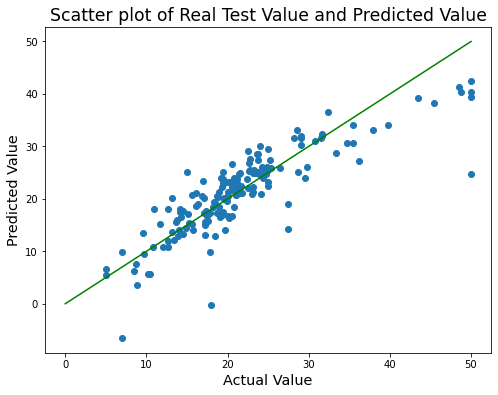

In [338]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
#plt.plot(y_test,y_pred)
plt.plot([0,50],[0,50],'g')
plt.xlabel('Actual Value',fontsize='x-large')
plt.ylabel('Predicted Value', fontsize='x-large')
plt.title('Scatter plot of Real Test Value and Predicted Value',fontsize='xx-large')

Text(0.5, 1.0, 'Graph between Actual and Predicted Price')

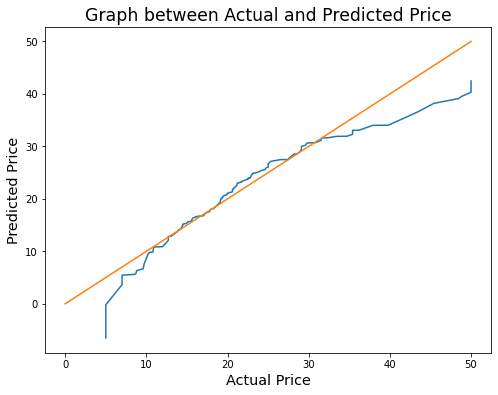

In [317]:
plt.figure(figsize=(8,6))
y_testsort=np.sort(y_test,axis=None)
y_predsort=np.sort(y_pred,axis=None)
plt.plot(y_testsort,y_predsort)
plt.plot([0,50],[0,50])
plt.xlabel('Actual Price',fontsize='x-large')
plt.ylabel('Predicted Price', fontsize='x-large')
plt.title('Graph between Actual and Predicted Price',fontsize='xx-large')

<AxesSubplot:ylabel='Count'>

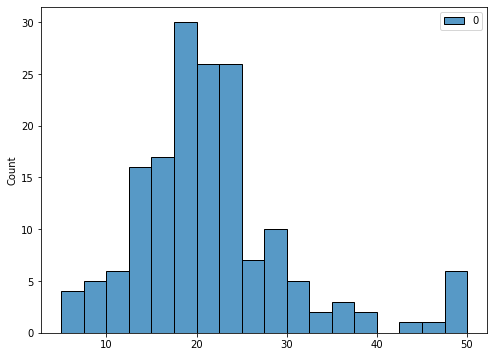

In [334]:
plt.figure(figsize=(8,6))
sns.histplot(y_test)

<AxesSubplot:ylabel='Count'>

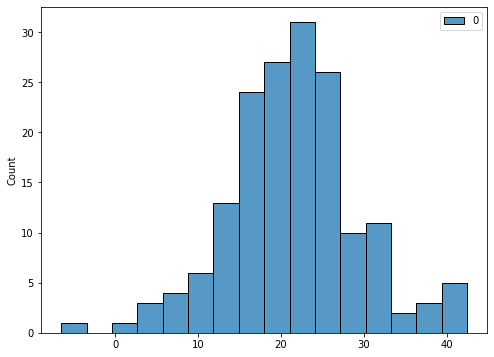

In [335]:
plt.figure(figsize=(8,6))
sns.histplot(y_pred)